<a href="https://colab.research.google.com/github/ajayvallabh/PytorchTutorial/blob/main/Self_Attention_for_transformer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math

L, d_k, d_v =4, 8, 8 # Length of the input sequence, size of each of the vectors for illustrative purposes
q = np.random.randn(L, d_k) # query vector
k = np.random.randn(L, d_k) # key vector
v = np.random.randn(L, d_v) # value vector

In [2]:
print("Q\n", q)
print("K\n", k)
print("V\n", v)

Q
 [[-0.97571141 -1.4084258   0.85765386  0.40328087 -1.68320015 -0.8114886
  -1.1353064   3.81165462]
 [ 0.09256007 -1.43058551  0.92521313 -0.2665744   1.31792221 -0.71806688
  -0.54201083  0.94766712]
 [ 0.0132578   0.47755363 -0.96212365 -1.22969531 -1.41255608  1.66327939
   0.67350132 -1.34805729]
 [ 1.32986008  0.06187404  2.02623309 -0.87612554 -0.50228742 -0.55177263
  -0.66013582  0.4795127 ]]
K
 [[-0.14873684  0.59720768  0.75902317 -1.30181283  1.17149411 -0.18831046
   0.33461812  0.73547018]
 [ 0.71418177 -0.26882076 -0.27493679 -0.92262498 -1.16459422  0.40400537
   0.6396001   0.32118434]
 [-0.29410083 -1.21652305 -0.58847222  1.59742101  2.22622054 -0.84914317
   0.46673953  0.02552858]
 [ 1.02317082 -1.39181225 -2.786326   -0.8405292  -1.56214675 -0.79065386
   0.70711312  1.56023449]]
V
 [[-1.13486929e+00  1.18551936e+00 -2.54745318e-01  1.78990235e+00
  -4.25412134e-01 -9.64014589e-01 -5.03209525e-01  1.05096561e+00]
 [ 2.12045446e-04 -4.53228061e-01 -1.42572684e+00

# Self Attention
$$self attention = softmax(\frac{Q.K^T}{\sqrt{d_k}} + M)V$$

In [3]:
np.matmul(q, k.T)

array([[ 0.03440141,  1.20440227, -1.3508471 ,  6.64856945],
       [ 2.3759363 , -1.42499295,  4.05776629, -0.66379624],
       [-1.58031846,  3.59498803, -6.26010021,  2.32778273],
       [ 2.16491349,  1.27820903, -4.00384618, -2.13251051]])

In [4]:
# Why we need sqrt(d_k) in denominator
q.var(), k.var(), np.matmul(q, k.T).var()

(np.float64(1.4710122425125802),
 np.float64(1.1253718513841289),
 np.float64(9.783258508123511))

In [6]:
scaled = np.matmul(q, k.T) / math.sqrt(d_k)
q.var(), k.var(), scaled.var()

(np.float64(1.4710122425125802),
 np.float64(1.1253718513841289),
 np.float64(1.2229073135154387))

In [7]:
scaled

array([[ 0.01216274,  0.4258205 , -0.47759657,  2.35062427],
       [ 0.84002033, -0.50381109,  1.43463703, -0.23468741],
       [-0.55872695,  1.27102021, -2.21327965,  0.82299548],
       [ 0.7654125 ,  0.45191514, -1.41557339, -0.75395632]])

# Masking
- this is ensure words don't get context from words generated in the feature.
- Not required in the encoders, but required into the decoder.

In [9]:
mask = np.tril(np.ones((L, L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [12]:
mask[mask == 0] = -np.inf
mask[mask == 1] = 0

In [13]:
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

In [14]:
scaled + mask

array([[ 0.01216274,        -inf,        -inf,        -inf],
       [ 0.84002033, -0.50381109,        -inf,        -inf],
       [-0.55872695,  1.27102021, -2.21327965,        -inf],
       [ 0.7654125 ,  0.45191514, -1.41557339, -0.75395632]])

# Softmax

- softmax operation is used to convert vector into probability distribution

$$ softmax = \frac{e^{x_i}}{\sum_je^{x_j}}$$

In [15]:
def softmax(x):
  return (np.exp(x).T/ np.sum(np.exp(x), axis=-1)).T

In [16]:
attention = softmax(scaled + mask)

In [17]:
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.79311931, 0.20688069, 0.        , 0.        ],
       [0.13470756, 0.83953938, 0.02575306, 0.        ],
       [0.48480937, 0.35434053, 0.05474959, 0.10610052]])

In [18]:
new_v = np.matmul(attention, v)
new_v

array([[-1.13486929,  1.18551936, -0.25474532,  1.78990235, -0.42541213,
        -0.96401459, -0.50320953,  1.05096561],
       [-0.90004288,  0.84649417, -0.49699878,  1.3812554 , -0.37906796,
        -0.81662829, -0.60218825,  0.89207854],
       [-0.15514394, -0.19352922, -1.25056946,  0.0750313 , -0.22804921,
        -0.32800537, -0.91904587,  0.39940406],
       [-0.54777524,  0.51055948, -0.84975337,  0.81418243, -0.34196816,
        -0.71427142, -0.81827782,  0.65468132]])

In [19]:
v

array([[-1.13486929e+00,  1.18551936e+00, -2.54745318e-01,
         1.78990235e+00, -4.25412134e-01, -9.64014589e-01,
        -5.03209525e-01,  1.05096561e+00],
       [ 2.12045446e-04, -4.53228061e-01, -1.42572684e+00,
        -1.85376042e-01, -2.01398129e-01, -2.51592864e-01,
        -9.81643365e-01,  2.82952560e-01],
       [-9.49979963e-02,  1.05910358e+00, -7.49406825e-01,
        -4.05838775e-01, -6.45096240e-02,  5.07776442e-01,
        -1.05352462e+00,  7.87527046e-01],
       [ 7.11210917e-02,  3.62111112e-01, -1.69676778e+00,
         3.23530535e-01, -5.73314611e-01, -1.74889925e+00,
        -1.59095416e+00,  1.68237610e-02]])

In [21]:
def softmax(x):
  return (np.exp(x).T/ np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask = None):
  d_k = q.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None:
    scaled = scaled + mask
  attention = softmax(scaled)
  out = np.matmul(attention, v)
  return out, attention

In [25]:
values, attention = scaled_dot_product_attention(q, k, v, mask=None)
print("Q\n", q)
print("K\n", k)
print("V\n", v)
print("New V\n", values)
print("Attention \n", attention)

Q
 [[-0.97571141 -1.4084258   0.85765386  0.40328087 -1.68320015 -0.8114886
  -1.1353064   3.81165462]
 [ 0.09256007 -1.43058551  0.92521313 -0.2665744   1.31792221 -0.71806688
  -0.54201083  0.94766712]
 [ 0.0132578   0.47755363 -0.96212365 -1.22969531 -1.41255608  1.66327939
   0.67350132 -1.34805729]
 [ 1.32986008  0.06187404  2.02623309 -0.87612554 -0.50228742 -0.55177263
  -0.66013582  0.4795127 ]]
K
 [[-0.14873684  0.59720768  0.75902317 -1.30181283  1.17149411 -0.18831046
   0.33461812  0.73547018]
 [ 0.71418177 -0.26882076 -0.27493679 -0.92262498 -1.16459422  0.40400537
   0.6396001   0.32118434]
 [-0.29410083 -1.21652305 -0.58847222  1.59742101  2.22622054 -0.84914317
   0.46673953  0.02552858]
 [ 1.02317082 -1.39181225 -2.786326   -0.8405292  -1.56214675 -0.79065386
   0.70711312  1.56023449]]
V
 [[-1.13486929e+00  1.18551936e+00 -2.54745318e-01  1.78990235e+00
  -4.25412134e-01 -9.64014589e-01 -5.03209525e-01  1.05096561e+00]
 [ 2.12045446e-04 -4.53228061e-01 -1.42572684e+00

# Multihead Attention

In [26]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
sequence_length = 4 # length of your sentence
batch_size = 1  # its help for parallel processing
input_dim = 512 # vector dimension of every word that goes into attention unit
d_model = 512 # output of the attention unit every single word
x = torch.randn((batch_size, sequence_length, input_dim))  # randomly generated input

In [28]:
x.size()

torch.Size([1, 4, 512])

In [29]:
qkv_layer = nn_layer = nn.Linear(input_dim, 3 * d_model) # we are creating a layer where query, key and value vectors all concatenated, which we will split later

In [31]:
qkv = qkv_layer(x)

In [32]:
qkv.shape

torch.Size([1, 4, 1536])

Text(0.5, 1.0, 'qkv distribution')

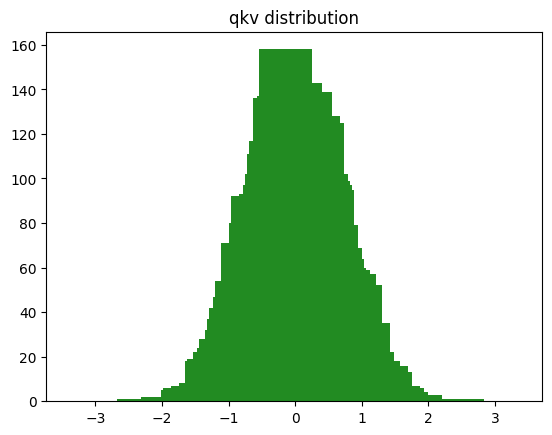

In [33]:
import matplotlib.pyplot as plt
y_val = torch.histc(qkv, bins=200, min=-3, max=3)
x_val = np.arange(-1,1,0.01) * 3
plt.bar(x_val,y_val, align='center', color=['forestgreen'])
plt.title('qkv distribution')

In [35]:
num_heads = 8 # how many attention block we want to create multi-head attention
head_dim = d_model // num_heads # dimension of each head
qkv = qkv.reshape(batch_size, sequence_length, num_heads, 3 * head_dim) # now we are changing the dimension of qkv matrix layer accroding to num_head

In [36]:
qkv.shape

torch.Size([1, 4, 8, 192])

In [37]:
qkv = qkv.permute(0, 2, 1, 3) # [batch_size, num_heads, sequence_length, 3 * head_dim]
qkv.shape

torch.Size([1, 8, 4, 192])

- now we are calculating the query, key and value matrix by breaking down qkv tensor

In [38]:
q, k, v = qkv.chunk(3, dim = -1)
q.shape, k.shape, v.shape # # [batch_size, num_heads, sequence_length, head_dim]

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

# Self Attention for multiple heads

For a single head:
$$ self attention = softmax(\frac{Q.K^T}{\sqrt{d_k}}+M)$$
$$new V =self attention.V$$

In [41]:
d_k = q.size()[-1]
scaled = torch.matmul(q, k.transpose(-2,-1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 8, 4, 4])

In [44]:
k.T.shape # [head_dim, sequence_length, num_heads, batch_size]

torch.Size([64, 4, 8, 1])

In [47]:
mask = torch.full(scaled.size(), float('-inf'))
mask = torch.triu(mask, diagonal=1)
mask[0][1] # mask for input to a single head

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [49]:
(scaled + mask)[0][0]

tensor([[-0.1955,    -inf,    -inf,    -inf],
        [ 0.0336, -0.3812,    -inf,    -inf],
        [ 0.1033, -0.3376,  0.1590,    -inf],
        [-0.5891,  0.3071, -0.4046, -1.1568]], grad_fn=<SelectBackward0>)

In [50]:
scaled += mask

In [51]:
np.exp(0.5596) / (np.exp(0.5596) + np.exp(0.0404))

np.float64(0.6269606805367254)

In [52]:
attention = F.softmax(scaled, dim=-1)

In [53]:
attention.shape

torch.Size([1, 8, 4, 4])

In [54]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.6022, 0.3978, 0.0000, 0.0000],
        [0.3703, 0.2383, 0.3915, 0.0000],
        [0.1916, 0.4694, 0.2304, 0.1086]], grad_fn=<SelectBackward0>)

In [55]:
values = torch.matmul(attention, v)
values.shape

torch.Size([1, 8, 4, 64])

# Function

In [57]:
def scaled_dot_product(q, k, v, mask = None):
  d_k = q.shape[-1]
  scaled = torch.matmul(q, k.transpose(-1,-2)) / math.sqrt(d_k)
  if mask is not None:
    scaled += mask
  attention = F.softmax(scaled, dim=-1)
  values = torch.matmul(attention, v)
  return values, attention

In [58]:
values, attention = scaled_dot_product(q, k, v, mask=None)

In [59]:
attention.shape

torch.Size([1, 8, 4, 4])

In [60]:
attention[0][0]

tensor([[0.2122, 0.1714, 0.3378, 0.2786],
        [0.2415, 0.1595, 0.1679, 0.4311],
        [0.2911, 0.1873, 0.3078, 0.2137],
        [0.1916, 0.4694, 0.2304, 0.1086]], grad_fn=<SelectBackward0>)

In [61]:
values.size()

torch.Size([1, 8, 4, 64])

In [62]:
values = values.reshape(batch_size, sequence_length, num_heads* head_dim)
values.size()

torch.Size([1, 4, 512])

In [63]:
linear_layer = nn.Linear(d_model, d_model)

In [65]:
out = linear_layer(values)
out.shape

torch.Size([1, 4, 512])

In [76]:
import torch
import torch.nn as nn
import math

def scaled_dot_product(q, k, v, mask = None):
  d_k = q.shape[-1]
  scaled = torch.matmul(q, k.transpose(-1,-2)) / math.sqrt(d_k)
  if mask is not None:
    scaled += mask
  attention = F.softmax(scaled, dim=-1)
  values = torch.matmul(attention, v)
  return values, attention

class MultiheadAttention(nn.Module):

  def __init__(self, input_dim, d_model, num_heads):
    super().__init__()
    self.input_dim = input_dim
    self.d_model = d_model
    self.num_heads = num_heads
    self.head_dim = d_model // num_heads
    self.qkv_layer = nn.Linear(input_dim, 3 * d_model)
    self.linear_layer = nn.Linear(d_model, d_model)

  def forward(self, x, mask=None):
    batch_size, sequence_length, input_dim = x.size()
    print(f"x.size():{x.size()}")
    qkv = self.qkv_layer(x)
    print(f"qkv.size(): {qkv.size()}")
    qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
    print(f"qkv.size(): {qkv.size()}")
    qkv = qkv.permute(0, 2, 1, 3)
    print(f"qkv.size(): {qkv.size()}")
    q, k, v = qkv.chunk(3, dim=-1)
    print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
    values, attention = scaled_dot_product(q, k, v, mask)
    print(f"values.size(): {values.size()}, attention.size: {attention.size()}")
    values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
    print(f"values.size(): {values.size()}")
    out = self.linear_layer(values)
    print(f"out.size(): {out.size()}")
    return out

# Input

In [77]:
input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = torch.randn((batch_size, sequence_length, input_dim))

model = MultiheadAttention(input_dim, d_model, num_heads)
out = model.forward(x)


x.size():torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q size: torch.Size([30, 8, 5, 64]), k size: torch.Size([30, 8, 5, 64]), v size: torch.Size([30, 8, 5, 64]), 
values.size(): torch.Size([30, 8, 5, 64]), attention.size: torch.Size([30, 8, 5, 5])
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])
